**SEMINAR 4**

Jan Prats 213927 | Oscar Sanz 253613 | Julia Pérez 267029

**PART 1: DATA PREPARATION & ANALYSIS**

In [1]:
from google.colab import drive
import pandas as pd


drive.mount('/content/drive')

#path julia
base_path = '/content/drive/MyDrive/3r/ML4N/MLforNetworks/dataset_Seminar4'


train_path = f'{base_path}/train_data.csv'
test_path = f'{base_path}/test_data.csv'


#import the libraries we are going to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Describe the statistics behind the main parameters of the dataset. For that, make use
 of the plots that you consider.

Training data statistics:
       LocationNumber          RSSI   TxLinkSpeed   RxLinkSpeed  \
count    33600.000000  33600.000000  33600.000000  33600.000000   
mean        18.151161    -62.364212    491.264874    460.954107   
std         10.338002      9.442463    240.868700    251.600115   
min          1.000000    -79.040000     33.240000    -12.530000   
25%          9.000000    -70.360000    273.200000    249.127500   
50%         18.000000    -62.910000    476.635000    396.480000   
75%         27.000000    -53.790000    664.390000    656.422500   
max         36.000000    -37.020000    905.390000    911.000000   

       MainAPConnect  TxThroughput  AvgPingLatency  
count   33600.000000  33600.000000    33600.000000  
mean        0.913958     12.988920       54.771372  
std         0.280430      4.413973        8.735672  
min         0.000000      0.780000       39.300000  
25%         1.000000     11.320000       48.940000  
50%         1.000000     14.790000       52.290000  

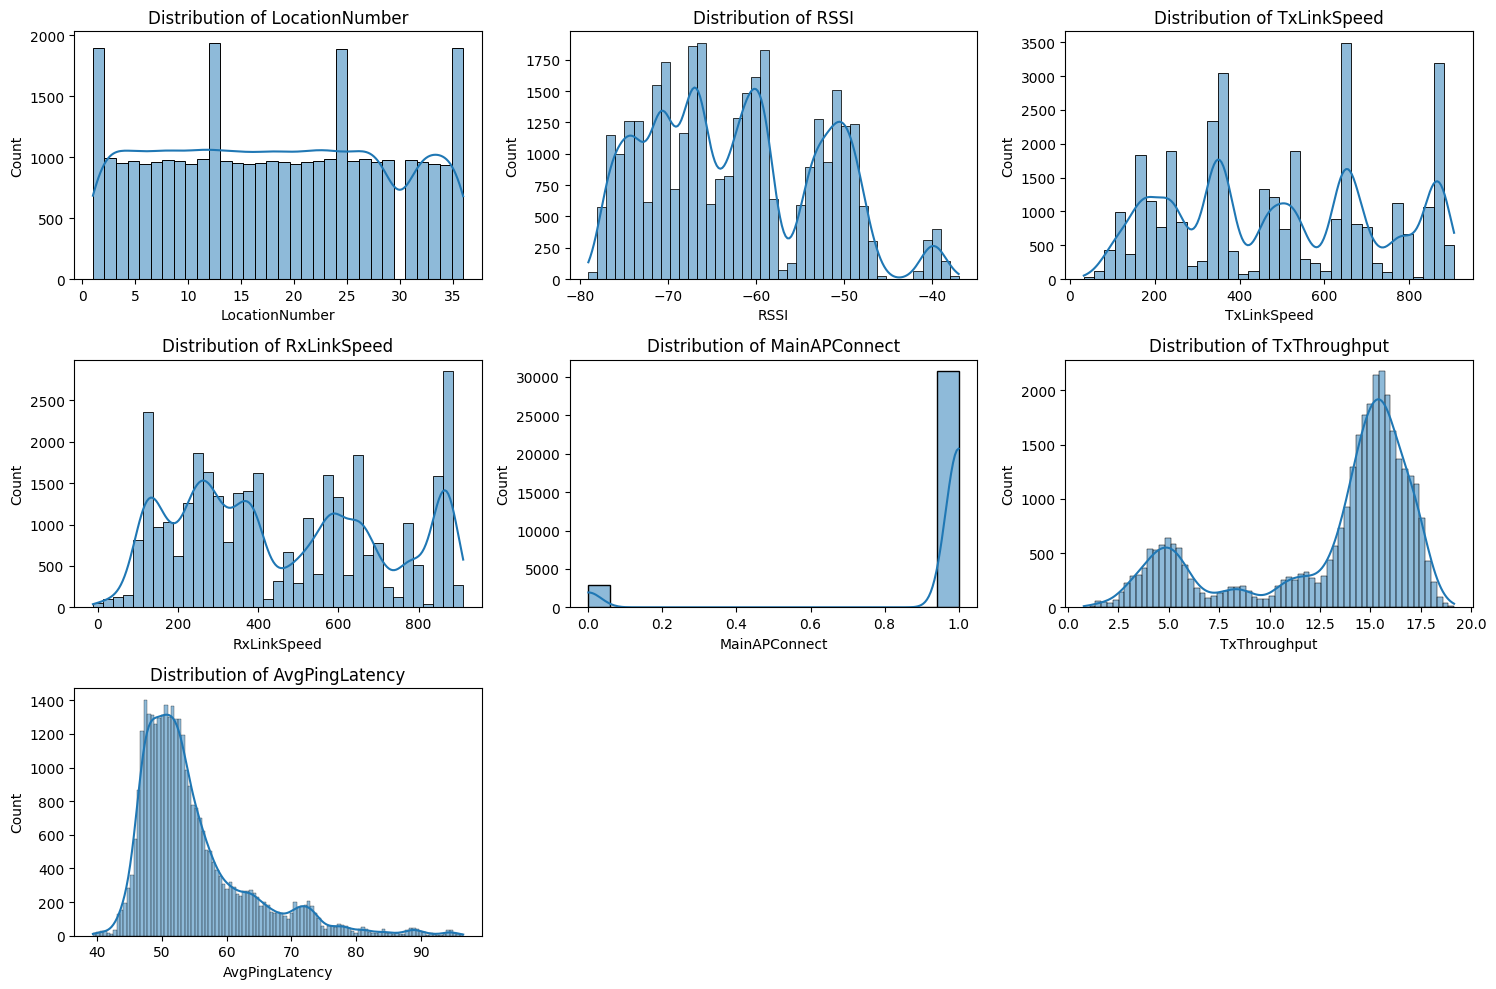

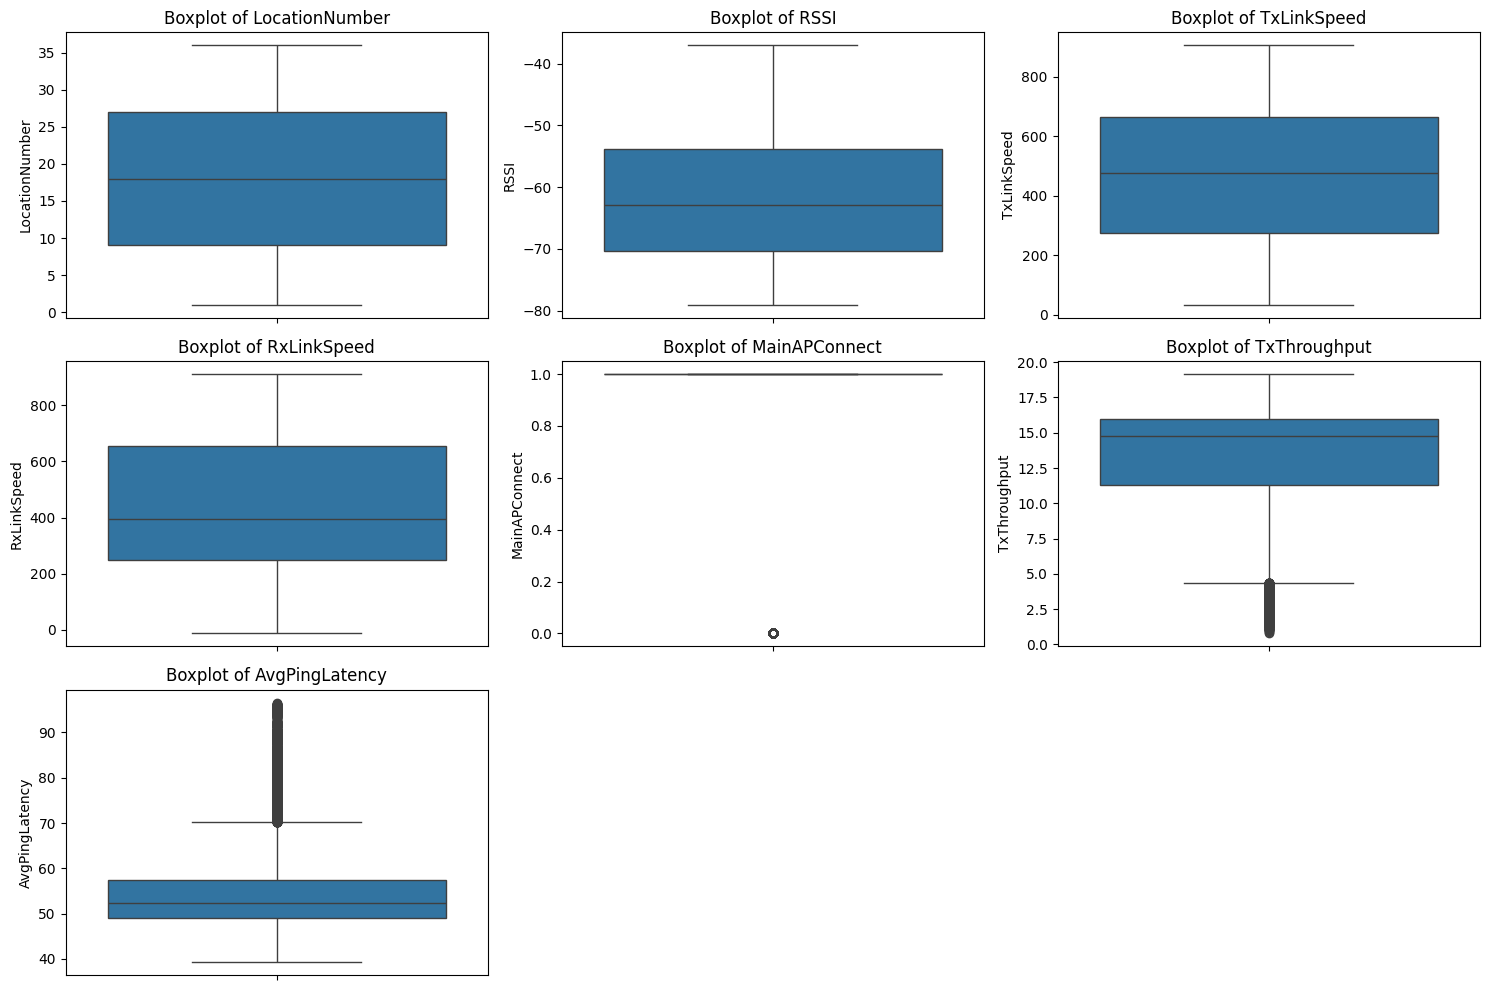

In [2]:
# Load training and test data
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Display descriptive statistics
print("Training data statistics:")
print(train_data.describe())

# Define features for visualization
features = ['LocationNumber', 'RSSI', 'TxLinkSpeed', 'RxLinkSpeed', 'MainAPConnect', 'TxThroughput', 'AvgPingLatency']

# Histograms for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Improved boxplots (one per feature to avoid scale distortion)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=train_data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


2. Perform a correlation analysis between the main features in the dataset and the per
formance metrics (throughput and delay).

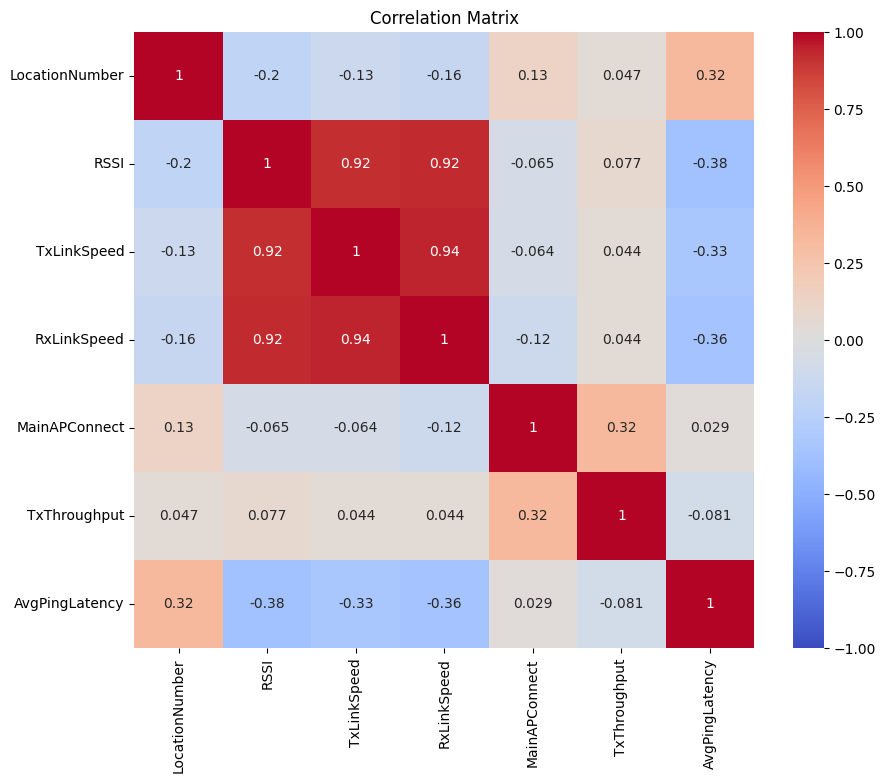

Correlations with TxThroughput:
TxThroughput      1.000000
MainAPConnect     0.321010
RSSI              0.076853
LocationNumber    0.046687
TxLinkSpeed       0.044451
RxLinkSpeed       0.044280
AvgPingLatency   -0.080901
Name: TxThroughput, dtype: float64

Correlations with AvgPingLatency:
AvgPingLatency    1.000000
LocationNumber    0.322541
MainAPConnect     0.028982
TxThroughput     -0.080901
TxLinkSpeed      -0.331170
RxLinkSpeed      -0.361945
RSSI             -0.375971
Name: AvgPingLatency, dtype: float64


In [3]:
# Correlation matrix analysis
correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

print("Correlations with TxThroughput:")
print(correlation_matrix['TxThroughput'].sort_values(ascending=False))
print("\nCorrelations with AvgPingLatency:")
print(correlation_matrix['AvgPingLatency'].sort_values(ascending=False))

# Justification Part 1

We initially used histograms to visualize the distribution of each key feature in the dataset. This helped us identify outliers and understand the shape of the data.

However, the boxplot was plotted for all variables on the same axis. This was suboptimal due to the very different scales among the features.
A better approach would have been to create individual boxplots per feature (as we later corrected), which would have made outlier detection and comparison much clearer.

---------------------
To better understand the relationships between all the variables in our dataset, we created a correlation matrix. This allowed us to measure how closely each feature is related to the others, especially to the performance metrics we want to predict (throughput and AvgPingLatency). From the heatmap, we observed that the feature MainAPConnect has a moderate positive correlation with TxThroughput, which makes sense being connected to the main access point generally provides a more stable and faster connection.

On the other hand, features like RSSI, TxLinkSpeed, and RxLinkSpeed show negative correlations with AvgPingLatency. This is logical too, because better signal quality and higher speeds tend to reduce delay in a Wi-Fi connection.


**PART 2: FNN-BASED PERFORMANCE PREDICTOR**

 1. Feature selection: select the features that you think will be most appropriate to
 predict Wi-Fi performance.

In [ ]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [4]:
features = ['RSSI', 'TxLinkSpeed', 'RxLinkSpeed', 'MainAPConnect']
#Why we choose this features?
#RSSI: Represents the intensity of the signal so its important to see if the signal is good enough
#TXLinkSpeed: is the velocity of the link when it goes down
#RxLinkSpeed: is the velocity of the link when it goes up
targets = ['TxThroughput', 'AvgPingLatency']  # we choose this two targets because the statement says to predict this metrics
X = train_data[features]
y = train_data[targets]

To predict Wi-Fi performance, we selected features that are directly related to signal quality and connection speed. RSSI, TxLinkSpeed, and RxLinkSpeed provide information about signal strength and link capacity. MainAPConnect indicates whether the device is connected to the main access point, which often results in better performance.

 2. Data preparation: apply the necessary data transformation techniques for your data
 (e.g., normalization, encoding).

In [5]:
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.utils.data import DataLoader, TensorDataset

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Use validation split from training data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Prepare test data
X_test = test_data[features]
y_test = test_data[targets]
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

# Dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

To ensure stable and efficient training of the neural network, MinMax normalization was applied to both the feature set and the target variables, scaling all values to a range between 0 and 1.

The dataset was then properly partitioned by splitting the training data into a training and a validation set using an 80/20 ratio. This corrects a prior issue where the test set was mistakenly used as validation data. The final test set was left untouched and only used for evaluation after training.

 3. FNN architecture design: design your FNN and try to justify your choices (number
 of layers, input/output layers, activations, loss function, optimizer, regularization, etc.)
 according to the problem and data at hand.

In [7]:
import torch.nn as nn
import torch.optim as optim

class WiFiFNN(nn.Module):
    def __init__(self):
        super(WiFiFNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(4, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 2)
        )

    def forward(self, x):
        return self.model(x)

# Instantiate model
model = WiFiFNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


The FNN architecture was designed with two hidden layers containing 64 and 32 neurons, respectively. This level of complexity was selected to balance model capacity because of the relatively small number of input features.
The activation function used in each hidden layer is ReLU, which we think is a good option for deep learning tasks due to its ability to avoid the vanishing gradient problem.

To mitigate overfitting, Dropout layers with a rate of 0.3 were included after each hidden layer, randomly deactivating neurons during training to force redundancy and improve generalization. The final layer has 2 output nodes, corresponding to the two regression targets.

The model is optimized using MSE loss, a standard choice for regression tasks, and trained using the Adam optimizer with a learning rate of 0.01. This learning rate was increased from default values based on earlier observations that the model was not learning due to a learning rate that was too low.


 4. Train your FNN: use the training data to train your FNN. Describe your training
 approach (epochs, batches, validation) and show the training process (e.g., validation
 loss per epoch).

Epoch 1, Train Loss: 0.0401, Val Loss: 0.0364
Epoch 2, Train Loss: 0.0368, Val Loss: 0.0361
Epoch 3, Train Loss: 0.0369, Val Loss: 0.0356
Epoch 4, Train Loss: 0.0368, Val Loss: 0.0361
Epoch 5, Train Loss: 0.0365, Val Loss: 0.0360
Epoch 6, Train Loss: 0.0364, Val Loss: 0.0357
Epoch 7, Train Loss: 0.0362, Val Loss: 0.0355
Epoch 8, Train Loss: 0.0361, Val Loss: 0.0363
Epoch 9, Train Loss: 0.0359, Val Loss: 0.0348
Epoch 10, Train Loss: 0.0358, Val Loss: 0.0354
Epoch 11, Train Loss: 0.0358, Val Loss: 0.0352
Epoch 12, Train Loss: 0.0356, Val Loss: 0.0348
Epoch 13, Train Loss: 0.0356, Val Loss: 0.0347
Epoch 14, Train Loss: 0.0357, Val Loss: 0.0354
Epoch 15, Train Loss: 0.0355, Val Loss: 0.0352
Epoch 16, Train Loss: 0.0356, Val Loss: 0.0352
Epoch 17, Train Loss: 0.0359, Val Loss: 0.0348
Epoch 18, Train Loss: 0.0357, Val Loss: 0.0346
Epoch 19, Train Loss: 0.0357, Val Loss: 0.0352
Epoch 20, Train Loss: 0.0358, Val Loss: 0.0356
Epoch 21, Train Loss: 0.0357, Val Loss: 0.0361
Epoch 22, Train Loss: 

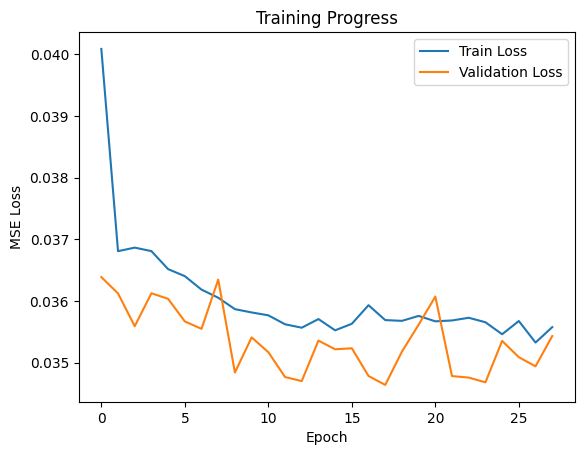

In [8]:
num_epochs = 100
patience = 10
best_val_loss = float('inf')
early_stop_counter = 0

train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * xb.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            preds = model(xb)
            val_loss += criterion(preds, yb).item() * xb.size(0)
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), f'{base_path}/best_model.pth')
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping triggered.")
            break

# Plot losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training Progress')
plt.show()


The model was trained for up to 100 epochs, but we used a method called early stopping to avoid overfitting. If the model doesn’t get better for 10 epochs in a row (a patience of 10), the training stops early. This helps us avoid training too much and prevents the model from memorizing the training data instead of learning patterns.

In each epoch, the model goes through two steps: training and validation. During training, the model makes predictions, calculates the loss, updates itself to do better, and repeats. For validation, the model just makes predictions without updating itself, which saves time and avoids mistakes.

We keep track of both training and validation errors at every step and make a plot of the losses to see how learning is going. This graph helps us check if the model is improving, overfitting, or not learning well.

Finally, we save the version of the model that performed best on the validation data, and use that version later when testing.

 5. Evaluate your FNN: evaluate your solution using the test data and report the results.

Test MSE: 0.0341
Test MAE: 0.1384


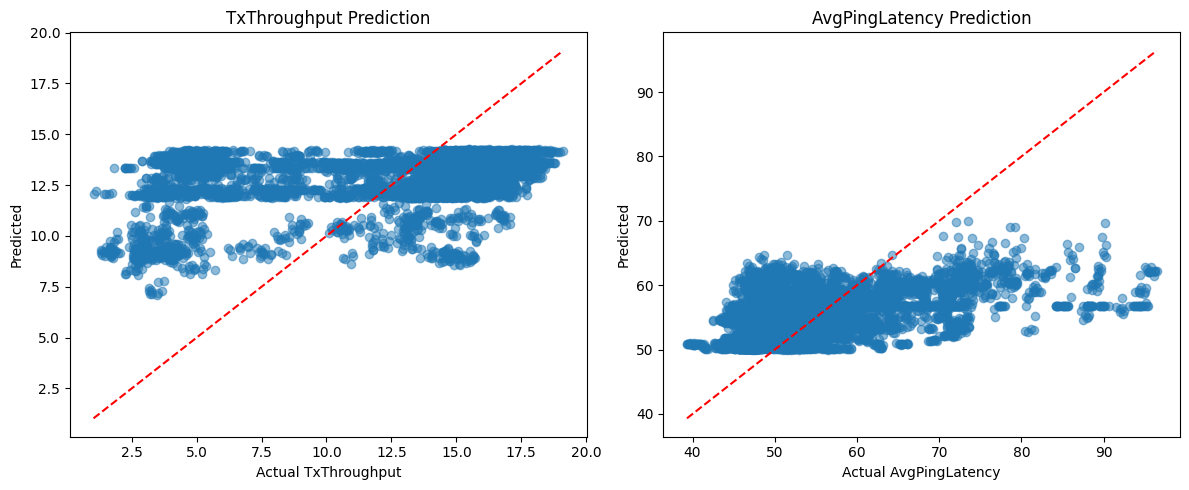

In [11]:
# model evaluation on testset
model.load_state_dict(torch.load(f'{base_path}/best_model.pth'))
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor).item()
    mae = torch.mean(torch.abs(predictions - y_test_tensor)).item()
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAE: {mae:.4f}")


# prediction visualization
y_pred_np = predictions.numpy()
y_pred = scaler_y.inverse_transform(y_pred_np)
y_true = scaler_y.inverse_transform(y_test_tensor.numpy())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_true[:, 0], y_pred[:, 0], alpha=0.5)
plt.plot([y_true[:, 0].min(), y_true[:, 0].max()], [y_true[:, 0].min(), y_true[:, 0].max()], 'r--')
plt.xlabel("Actual TxThroughput")
plt.ylabel("Predicted")
plt.title("TxThroughput Prediction")

plt.subplot(1, 2, 2)
plt.scatter(y_true[:, 1], y_pred[:, 1], alpha=0.5)
plt.plot([y_true[:, 1].min(), y_true[:, 1].max()], [y_true[:, 1].min(), y_true[:, 1].max()], 'r--')
plt.xlabel("Actual AvgPingLatency")
plt.ylabel("Predicted")
plt.title("AvgPingLatency Prediction")

plt.tight_layout()
plt.show()

The results, with a Test MSE of 0.0341 and a Test MAE of 0.1384, show the model predicts TxThroughput and AvgPingLatency well, with small squared and average errors. The code checks this by loading the best model and calculating these numbers.
